In [1]:
import ModelCreatorWord as md

embed = 100
embedfile = 'glove.6B.100d.txt'
author_list = [111, 59, 71, 21] 
doc_id = 1007
chunk_size = 1000
nb_epoch = 100

Using Theano backend.
Using gpu device 0: GeForce GTX 950 (CNMeM is disabled, cuDNN 5005)


In [2]:
embeddings_index = md.readVectorData(embedfile, GLOVE_DIR='../../glove/')
(texts, labels, labels_index) = md.loadAuthData(author_list, doc_id, chunk_size = chunk_size, samples = 1600)

Found 400000 word vectors.
Execution completed
Read completed
Number of rows: 144
author_id       int64
doc_content    object
dtype: object
Data Frame created: Shape: (16136, 2)
Author:    21  Size:  7854
Author:    59  Size:  7854
Author:    71  Size:  7854
Author:   111  Size:  7854
Min: 1603
Max: 7854
Authors [21, 59, 71, 111].
Found 6400 texts.
Found 6400 labels.


In [3]:
print len(texts[0])

4582


In [4]:
print labels[0]

0


In [5]:
(trainX, trainY, valX, valY) = md.preProcessTrainVal(texts, labels, chunk_size = chunk_size)

Found 72369 unique tokens.
Shape of data tensor: (6400, 1000)
Shape of label tensor: (6400, 4)


In [6]:
embedding_matrix = md.prepareEmbeddingMatrix(embeddings_index, EMBEDDING_DIM = embed)
model = md.compileModel(len(labels_index), embedding_matrix, chunk_size = chunk_size, EMBEDDING_DIM = embed)

Done compiling.


In [7]:
(model, history) = md.fitModel(model, trainX, trainY, valX, valY, nb_epoch = nb_epoch)

Train on 5120 samples, validate on 1280 samples
Epoch 1/150
5120/5120 [==============================] - 30s - loss: 1.3873 - acc: 0.2576 - val_loss: 1.3804 - val_acc: 0.3492

In [8]:
(testX, testY) = md.loadDocData(author_list, doc_id, chunk_size = chunk_size)
(testX, testY) = md.preProcessTest(testX, labels_index, testY, chunk_size = chunk_size)
# testY = np.mean(testY, axis=0)

Execution completed
Read completed
Number of rows: 1
author_id       int64
doc_content    object
dtype: object
Data Frame created: Shape: (91, 2)
Found 91 texts.
Found 72369 unique tokens.
Shape of data tensor: (91, 1000)


In [9]:
(predYList, predY) = md.predictModel(model, testX)

In [10]:
print labels_index

{0: 21, 1: 59, 2: 71, 3: 111}


In [11]:
print predY

[ 0.01235103  0.84466875  0.00320271  0.13977747]


In [12]:
import numpy as np
print np.mean(predYList, axis=0)

[ 0.01470562  0.81751788  0.00345814  0.16431841]


In [13]:
import numpy as np
print np.mean(testY, axis=0)

1.0


In [14]:
print predYList

[[  1.33630086e-03   9.97968137e-01   7.65600707e-05   6.18980266e-04]
 [  3.11074778e-04   9.99186337e-01   8.61353510e-06   4.93987463e-04]
 [  3.90596711e-03   9.95909095e-01   1.31639637e-04   5.32765698e-05]
 [  2.96781603e-02   9.55153704e-01   6.55555353e-03   8.61262623e-03]
 [  5.24332980e-03   9.94513988e-01   1.97706686e-04   4.50351836e-05]
 [  2.32678354e-02   9.73949432e-01   2.58566299e-03   1.97069719e-04]
 [  4.17370163e-03   9.95769382e-01   3.90105051e-05   1.78807277e-05]
 [  1.90680102e-02   9.80497718e-01   3.78168013e-04   5.60997396e-05]
 [  9.33435932e-03   9.90428329e-01   1.92371765e-04   4.49315521e-05]
 [  8.33419524e-03   9.90955532e-01   4.32267843e-04   2.77986604e-04]
 [  1.31802540e-02   9.86215055e-01   5.71325538e-04   3.33563949e-05]
 [  7.91220143e-02   9.10678923e-01   5.17914258e-03   5.01984032e-03]
 [  4.18987609e-02   9.52782512e-01   3.27786780e-03   2.04079226e-03]
 [  6.28585834e-03   9.93415117e-01   2.54357175e-04   4.46689446e-05]
 [  2.

In [18]:
print(history.history)

{'acc': [0.25761718617286533, 0.28730468911817297, 0.30039062787545845, 0.32324218895519152, 0.34960937511641532, 0.39199218858266249, 0.43867187271825969, 0.46816406247671694, 0.48515624867286533, 0.55097655940335244, 0.60664062562864274, 0.64062499930150807, 0.67324218573048711, 0.69609375018626451, 0.69101562700234354, 0.71874999720603228, 0.73476562171708792, 0.7468749990221113, 0.75332030886784196, 0.77734374790452421, 0.79335937299765646, 0.79785156040452421, 0.82089843787252903, 0.82363280514255166, 0.83496093610301614, 0.84042968810535967, 0.8384765658993274, 0.86484374897554517, 0.86601562518626451, 0.87109374906867743, 0.86875000013969839, 0.87363280821591616, 0.88613281096331775, 0.88300780742429197, 0.88789062201976776, 0.90312500135041773, 0.86230469204019755, 0.90839843754656613, 0.91210937593132257, 0.91289062425494194, 0.91269531496800482, 0.91210937686264515, 0.91562499944120646, 0.92226562765426934, 0.93105469131842256, 0.93515624990686774, 0.92753906617872417, 0.8830

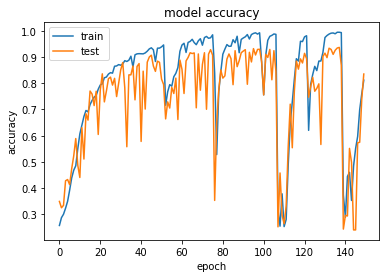

In [16]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

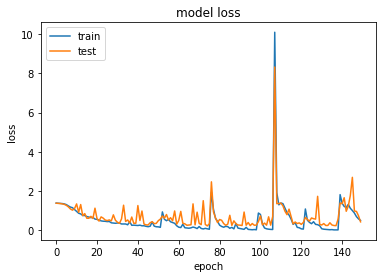

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()